In [1]:
import uproot
file = uproot.open("/Users/bertabeltran/muon_data/data/SDataF_May04.root")

Here I look what is inside the .root file 

In [2]:
file.classnames()

{'Data_F;1': 'TTree'}

I see that inside the file there is a single tree called Data_F, so I define a vairiable ponting to it 


In [4]:
tree=file['Data_F']

Here I am checking the branches in the tree. arrays() loads the braches in the tree called Data_F

In [41]:
tree.arrays()

<Array [{Channel: 1, Timestamp: ..., ...}, ...] type='6062 * {Channel: uint...'>

In [6]:
tree.values()

[<TBranch 'Channel' at 0x7fd516aeb5e0>,
 <TBranch 'Timestamp' at 0x7fd516aebe80>,
 <TBranch 'Board' at 0x7fd516af44f0>,
 <TBranch 'Energy' at 0x7fd516af4c10>,
 <TBranch 'EnergyShort' at 0x7fd516af5330>,
 <TBranch 'Flags' at 0x7fd516af5a50>,
 <TBranchElement 'Samples' at 0x7fd516af6170>]

In [14]:
energy_branch=tree["Energy"].array()

In [11]:
len(energy_branch)

6062

In [15]:
channel_branch=tree["Channel"].array()

In [16]:
channel_branch==0

<Array [False, True, False, True, ..., True, True, False] type='6062 * bool'>

In [17]:
chnannel_0_mask=channel_branch==0

In [18]:
chnannel_1_mask=channel_branch==1

In [20]:
import numpy as np
np.sum(chnannel_0_mask)

3031

In [21]:
np.sum(chnannel_1_mask)

3031

In [24]:
energy_branch[chnannel_0_mask]

<Array [1189, 1051, 2218, 1741, ..., 1149, 1335, 2093] type='3031 * uint16'>

In [25]:
len(energy_branch)

6062

In [26]:
len(energy_branch[chnannel_0_mask])

3031

In [27]:
import matplotlib.pyplot as plt

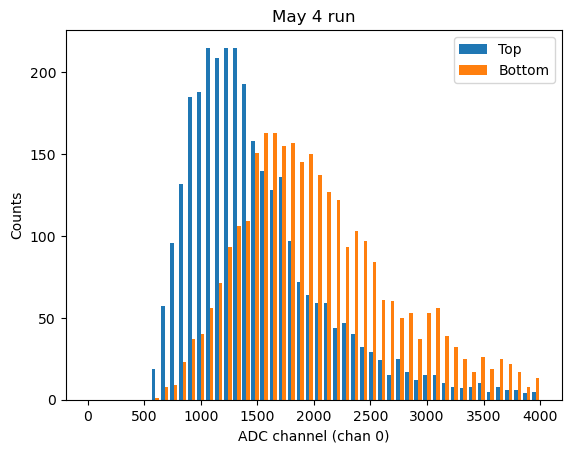

In [40]:
plt.hist([energy_branch[chnannel_0_mask], energy_branch[chnannel_1_mask]],
         label=['Top', 'Bottom'],
         bins=50, range=(0, 4000))
plt.title('May 4 run')
plt.xlabel('ADC channel (chan 0)')
plt.ylabel('Counts')
plt.legend()
plt.show()